In [8]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

from scipy.stats import ttest_1samp as t_test
from scipy.stats import wilcoxon as wilcoxon_test

In [12]:
EPSILONS = np.arange(0, .2, .025)
MU_1 = .25
N = 250
REPLICATIONS = 1000
TEST_FNS = {'wilcoxon': lambda x: wilcoxon_test(x)[1],
            't': lambda x: t_test(x, 0)[1]}

In [13]:
def sampler_factory(mu, epsilon):
    def sampler():
        if np.random.uniform(0, 1) < epsilon:
            return np.random.normal(loc=mu, scale=10)
        else:
            return np.random.normal(loc=mu, scale=1)
        
    return sampler

In [14]:
size = {'wilcoxon':[],
        't':[]}

power = {'wilcoxon':[],
         't':[]}

for epsilon in tqdm(EPSILONS):
    
    #build samplers
    control_sampler = sampler_factory(0, 0)
    center_sampler = sampler_factory(0, epsilon)
    offcenter_sampler = sampler_factory(MU_1, epsilon) 
    
    #set up logging
    type_I_errors = {'wilcoxon':0,
                     't':0,}
    
    correct_rejections = {'wilcoxon':0,
                          't':0,}
    
    #monte carlo main loop
    for replication in range(REPLICATIONS):
        
        #get control
        control = [control_sampler() for _ in range(N)]
        
        #simulate size
        sample = [center_sampler() for _ in range(N)]
        
        for test_name, test_fn in TEST_FNS.items():
            p = test_fn(sample)
            if p < .05:
                type_I_errors[test_name] +=1
                
                
        #simulate power
        sample = [offcenter_sampler() for _ in range(N)]
        for test_name, test_fn in TEST_FNS.items():
            p = test_fn(sample)
            if p < .05:
                correct_rejections[test_name] +=1
                
    #log out the result of this epsilon's test
    for test_name, errors in type_I_errors.items():
        size[test_name].append(errors/REPLICATIONS)
        
    for test_name, corrects in correct_rejections.items():
        power[test_name].append(corrects/REPLICATIONS)

100%|██████████| 8/8 [00:22<00:00,  2.77s/it]


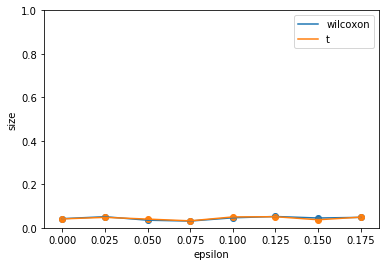

In [15]:
plt.figure()
for alg, series in size.items():
    plt.plot(EPSILONS, series, label=alg)
    plt.scatter(EPSILONS, series)
    
plt.xlabel('epsilon')
plt.ylabel('size')
plt.ylim(top=1, bottom=0)
plt.legend()
plt.savefig('4a.png')
plt.show()

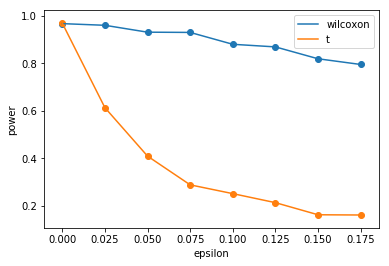

In [16]:
plt.figure()
for alg, series in power.items():
    plt.plot(EPSILONS, series, label=alg)
    plt.scatter(EPSILONS, series)
    
plt.xlabel('epsilon')
plt.ylabel('power')
plt.legend()
plt.savefig('4b.png')
plt.show()